# **Decision Tree & Random Forest on Heart Disease Dataset**

### 1: Import Required Libraries



In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
sns.set_style("whitegrid")


### 2: Load and Inspect Dataset

We load the heart.csv dataset and inspect the first few rows to understand the structure and features.

In [2]:
# Load heart disease dataset
df = pd.read_csv('data/heart.csv')

# Display top rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 3: Data Exploration and Preprocessing

We check for missing values and understand the data types. Categorical features should already be encoded numerically in this dataset.

In [14]:
# Check for missing values
df.isnull().sum()

# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 4: Feature and Target Separation

We split the dataset into independent variables (X) and the target variable (y).

In [4]:
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target (0 = no disease, 1 = disease)


### 5: Train-Test Split

Split the data into training and testing sets using an 80-20 ratio.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 6: Feature Scaling

We scale features to ensure consistent input for tree-based models

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 7: Train a Decision Tree Classifier

Train a basic decision tree classifier on the scaled data and evaluate accuracy.

In [7]:
# Train decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_scaled)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366


### 8: Visualize the Decision Tree

We visualize the full decision tree to understand how splits are made. This helps detect complexity or overfitting.

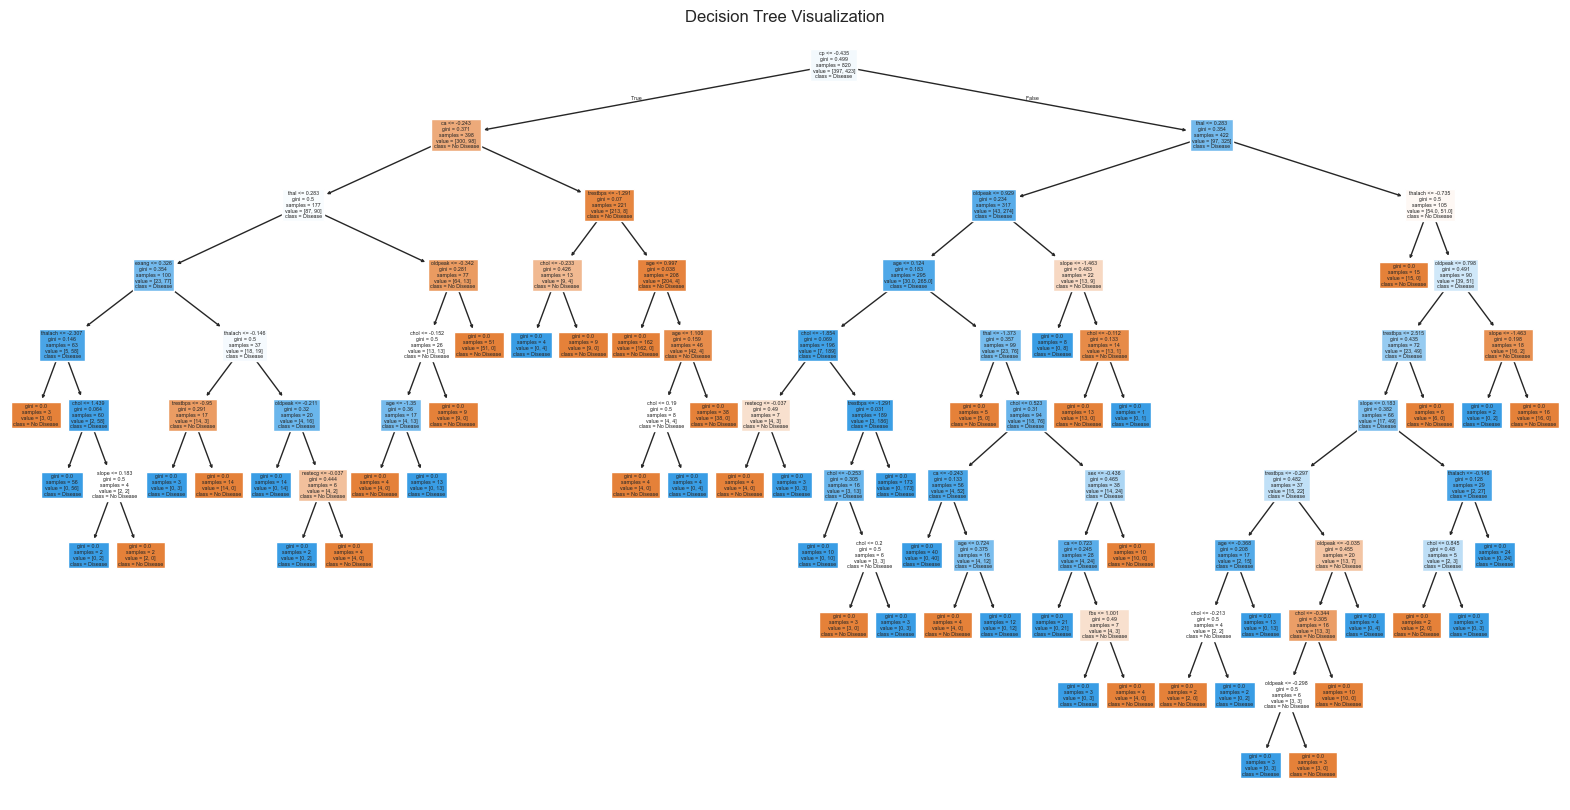

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### 9: Analyze Overfitting (Control Tree Depth)

We limit tree depth to reduce overfitting and improve generalization.



In [9]:
# Limit tree depth to avoid overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train_scaled, y_train)
y_pred_pruned = dt_pruned.predict(X_test_scaled)

# Evaluate
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.8


### 10: Train a Random Forest Classifier

We train a Random Forest, which is an ensemble of decision trees, and compare its accuracy to a single tree.



In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


### 11: Interpret Feature Importances

Barplot shows which features are most important for the random forest’s decisions.

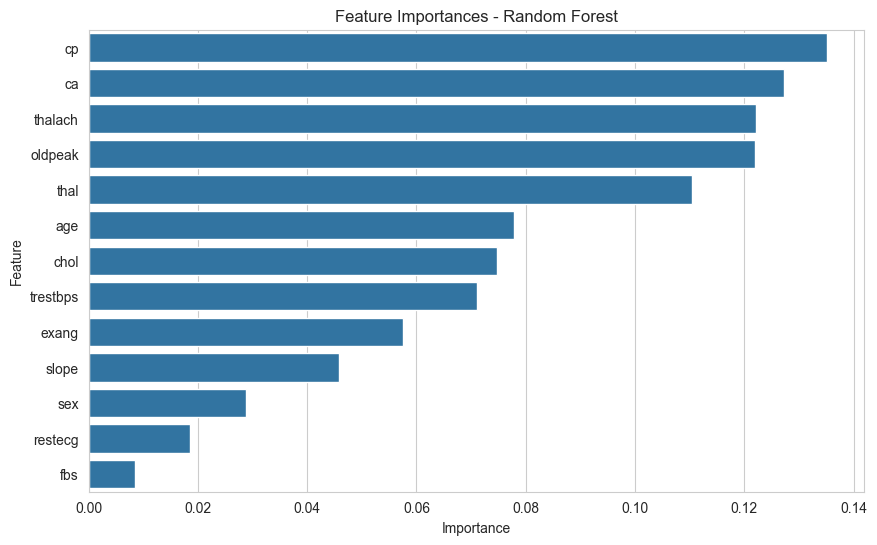

In [11]:
importances = rf_model.feature_importances_
features = X.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Feature Importances - Random Forest")
plt.show()


### 12: Evaluate Using Cross-Validation

Cross-validation checks model stability by training/testing on different subsets of data and averaging accuracy.

In [12]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


### ✅ Conclusion:

- The decision tree model was simple and interpretable but prone to overfitting.
- Controlling the max depth helped improve generalization.
- The random forest model gave higher accuracy due to ensemble learning and reduced variance.
- Feature importance revealed which inputs most influenced predictions.
- Cross-validation confirmed that the model performs consistently across different data splits.
